%matplotlib inline的作用是當你調用matplotlib.pyplot的繪圖函數plot()進行繪圖的時候，或者生成一個figure畫布的時候，可以直接在你的python console裏面生成圖像，如果你是在spyder的話就不用加這行。

In [29]:
%matplotlib inline

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [31]:
dataset = pd.read_csv('data2.csv')

print(dataset.keys())
print(dataset.columns)
dataset.head()

Index(['Pretty Formula', 'Density', 'Energy', 'Energy_per_Atom', 'Volume',
       'Formation_Energy_per_Atom', 'Band Gap'],
      dtype='object')
Index(['Pretty Formula', 'Density', 'Energy', 'Energy_per_Atom', 'Volume',
       'Formation_Energy_per_Atom', 'Band Gap'],
      dtype='object')


,Pretty Formula,Density,Energy,Energy_per_Atom,Volume,Formation_Energy_per_Atom,Band Gap
0,B13C2,2.438648,-106.358032,-7.090535,112.056191,-0.072416,0.0089
1,SiB3,2.449974,-204.992906,-6.406028,328.145035,-0.040804,1.4083
2,SnB6,4.110240,-42.852113,-6.121730,74.164800,0.175492,0.7527
3,B6Pb,6.003820,-42.968600,-6.138371,75.248129,0.114862,0.9209
4,BN,3.302143,-68.876677,-8.609585,49.920018,-1.294085,4.7885


In [44]:
X = dataset.iloc[:,1].values
y = dataset.iloc[:,6].values

print(X.shape, y.shape)
print(X[0:9])
print(y[0:9])

(194,) (194,)
[2.43864804 2.44997354 4.11023982 6.00381989 3.30214299 2.58888539
 5.08763369 5.97400493 8.6171894 ]
[8.9000e-03 1.4083e+00 7.5270e-01 9.2090e-01 4.7885e+00 2.5139e+00
 1.2071e+00 7.5260e-01 1.0000e-04]


no numeric data to plot


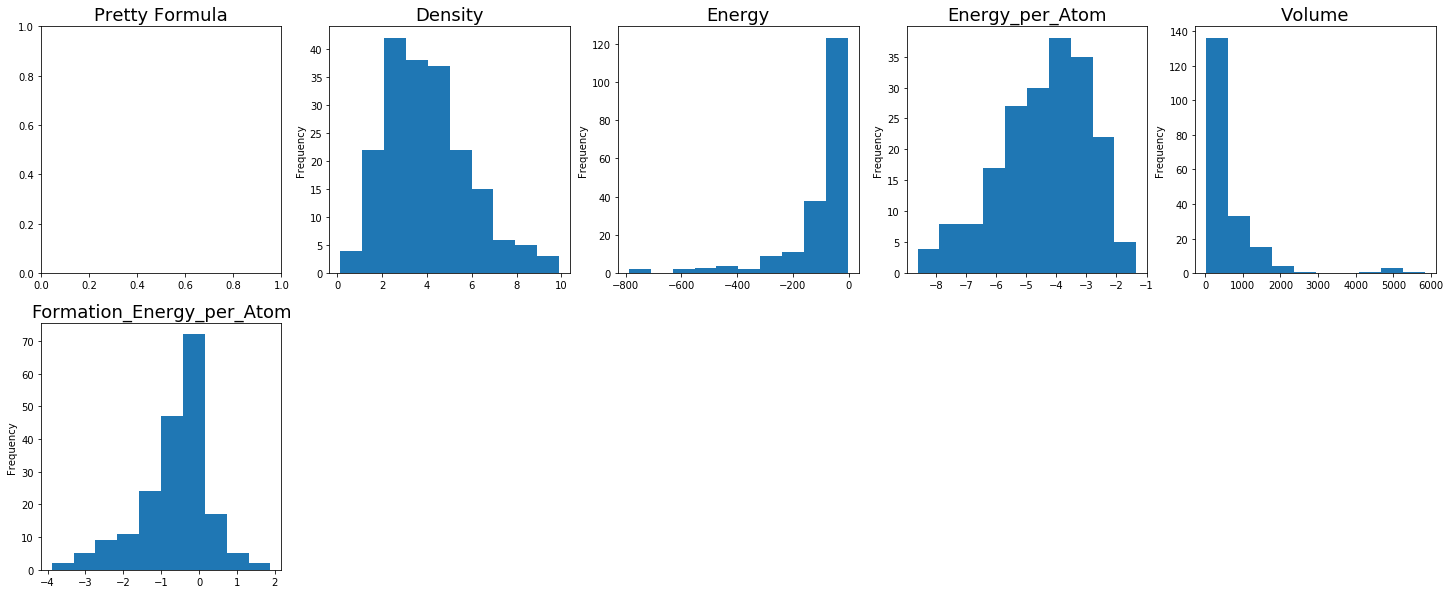

In [45]:
import math
import matplotlib.gridspec as gridspec

N = len(list(dataset.keys()))
cols = 5
rows = int(math.ceil(N / cols))
#print(N, cols, rows)

fig = plt.figure(figsize=(cols*5, rows*5), facecolor='w')
gs = gridspec.GridSpec(rows, cols)
i=0
feature=dataset[['Pretty Formula', 'Density', 'Energy', 'Energy_per_Atom', 'Volume', 'Formation_Energy_per_Atom']]
for item in feature.columns:
    ax = fig.add_subplot(gs[i])
    ax.set_title(item, fontsize=18)
    try:
        dataset[item].plot.hist()
    except TypeError:
        print("no numeric data to plot")
    finally:
        i+=1

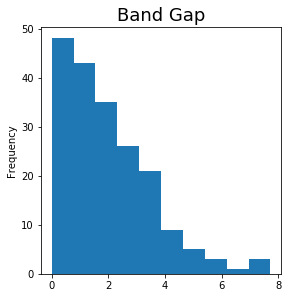

In [46]:
N = len(list(dataset.keys()))
cols = 5
rows = int(math.ceil(N / cols))
#print(N, cols, rows)

fig = plt.figure(figsize=(cols*5, rows*5), facecolor='w')
gs = gridspec.GridSpec(rows, cols)
i=0
target=dataset[['Band Gap']]
for item in target.columns:
    ax = fig.add_subplot(gs[i])
    ax.set_title(item, fontsize=18)
    try:
        dataset[item].plot.hist()
    except TypeError:
        print("no numeric data to plot")
    finally:
        i+=1

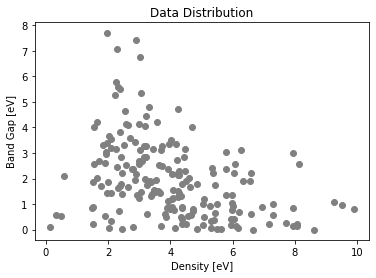

In [47]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = 'gray')

plt.title('Data Distribution')
plt.xlabel('Density [eV]')
plt.ylabel('Band Gap [eV]')
plt.show()

# Splitting the dataset into the Training set and Test set
![holdout](https://cdn-images-1.medium.com/max/640/1*4G__SV580CxFj78o9yUXuQ.png)

In [48]:
# Split the data into training/testing sets manually
X_train = X[:-39]
X_test = X[-39:]
print(X_train.shape, X_test.shape)

y_train = y[:-39]
y_test = y[-39:]
print(y_train.shape, y_test.shape)

(155,) (39,)
(155,) (39,)


In [49]:
def func(p,x):
    k,b=p
    return k*x+b

def error(p,x,y):
    return func(p,x)-y

In [50]:
# scipy.optimize.leastsq
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html

from scipy.optimize import leastsq

#指定一組初始猜值
p0=(1,20)

#leastsq函數的傳回值是一個tuple，第一个元素是求解结果，第二个是求解的loss function
Para=leastsq(error,p0,args=(X_train,y_train))

k,b=Para[0]
print("k=",k,"b=",b)
print("cost：", Para[1])

print("y="+str(round(k,2))+"x+"+str(round(b,2)))

k= -0.32329485212200576 b= 3.22288510038946
cost： 1
y=-0.32x+3.22


In [51]:
#density of MoS2 : 5.06 g/cm³
test = np.array([5.06])
y_pred=func(Para[0],test)
print("The caculated bandgap is: 1.8eV", )
print("The predictive bandgap is: ", y_pred)

The caculated bandgap is: 1.8eV
The predictive bandgap is:  [1.58701315]


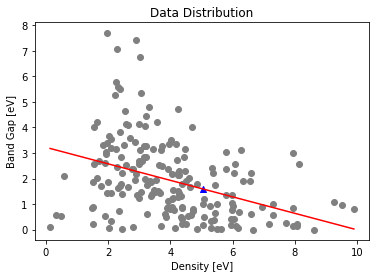

In [52]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = 'gray')
plt.plot(X_grid, func(Para[0], X_grid), color="red")
plt.scatter(test, y_pred, marker='^', color='blue')
plt.title('Data Distribution')
plt.xlabel('Density [eV]')
plt.ylabel('Band Gap [eV]')
plt.show()

# Scikit-Learning version

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(155,) (39,)
(155,) (39,)


# Fitting the Regression Model to the dataset

In [54]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0 )
regressor.fit(X_train.reshape(-1, 1), y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

# Visualising the Regression results for higher and smoother curve

The caculated bandgap is: 1.8eV
The predictive bandgap is:  [0.390599]


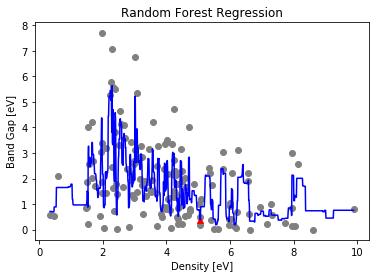

In [55]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Random Forest Regression')
plt.xlabel('Density [eV]')
plt.ylabel('Band Gap [eV]')
#density of MoS2 : 5.06 g/cm³
test = np.array([5.06])
test = test.reshape(len(test), 1)
print("The caculated bandgap is: 1.8eV", )
y_pred=regressor.predict(test)
print("The predictive bandgap is: ",y_pred)
plt.scatter(test, y_pred, marker='^', color='red')
plt.show()

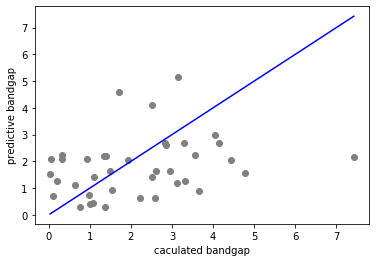

In [56]:
y_grid = np.arange(min(y_test), max(y_test), 0.01)
y_grid = y_grid.reshape(len(y_grid), 1)
plt.xlabel('caculated bandgap')
plt.ylabel('predictive bandgap')
plt.scatter(y_test, regressor.predict(X_test.reshape(-1, 1)), color = 'gray')
plt.plot(y_grid, y_grid, color="blue")
plt.show()

In [57]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

lr.fit(X_train.reshape(-1, 1), y_train)
y_pred = lr.predict(test)
print("The caculated bandgap is: 1.8eV", )
print("The predictive bandgap is: ",y_pred)

The caculated bandgap is: 1.8eV
The predictive bandgap is:  [1.58122735]


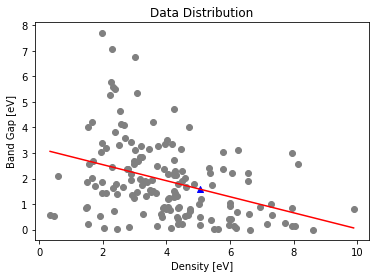

In [58]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_grid, lr.predict(X_grid), color="red")
plt.scatter(test, y_pred, marker='^', color='blue')
plt.title('Data Distribution')
plt.xlabel('Density [eV]')
plt.ylabel('Band Gap [eV]')
plt.show()

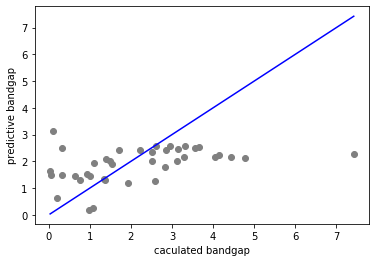

In [59]:
y_grid = np.arange(min(y_test), max(y_test), 0.01)
y_grid = y_grid.reshape(len(y_grid), 1)
plt.xlabel('caculated bandgap')
plt.ylabel('predictive bandgap')
plt.scatter(y_test, lr.predict(X_test.reshape(-1, 1)), color = 'gray')
plt.plot(y_grid, y_grid, color="blue")
plt.show()

In [60]:
lasso = linear_model.Lasso()

In [61]:
rr = linear_model.Ridge()

In [62]:
from sklearn.neural_network import MLPRegressor
mlpr =  MLPRegressor(hidden_layer_sizes=(5, 3), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate_init=0.001, max_iter=10000, random_state=497)
mlpr.fit(X_train.reshape(-1, 1), y_train)
y_pred = mlpr.predict(test)
print("The caculated bandgap is: 1.8eV", )
print("The predictive bandgap is: ",y_pred)

The caculated bandgap is: 1.8eV
The predictive bandgap is:  [1.52531112]


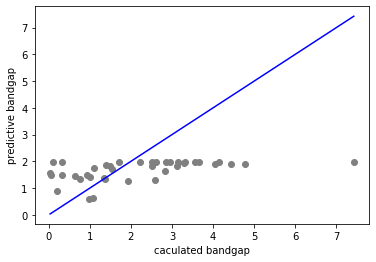

In [23]:
y_grid = np.arange(min(y_test), max(y_test), 0.01)
y_grid = y_grid.reshape(len(y_grid), 1)
plt.xlabel('caculated bandgap')
plt.ylabel('predictive bandgap')
plt.scatter(y_test, mlpr.predict(X_test.reshape(-1, 1)), color = 'gray')
plt.plot(y_grid, y_grid, color="blue")
plt.show()